# House Pricing Project

Please fill out:
* Student name: Sainath Vineeth Raju Putta
* Student pace: part time 
* Scheduled project review date/time: 05/06/2022
* Instructor name: Hardik Idnani
* Blog post URL:


### Overview

The KC Housing Data with number of data in a single data set has been given to do a regression and estimate the validation of data to the analysis using test data and training data.

### Business Problem

The main business problem of the KC housing data study is how are the prices of the house dependent on the number of bedrooms and bathrooms and also to what extent is the data valid.

### Importing Libraries

In [1]:
#Defining required libraries and importing them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from locale import atof
import statsmodels.api as sm #importing
from statsmodels.formula.api import ols


%matplotlib inline

### Data Understanding

In [2]:
#Load the data set "kc_house_data" and understanding it
df = pd.read_csv('data/kc_house_data.csv')# loading data set
df.head(3)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [3]:
df.duplicated().sum() #Checking Duplicates

0

In [4]:
df.isnull().sum() #Checking for Null values


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
d1=df.dropna()  # Dropping null values

In [6]:
d1.isnull().sum()  #Checking for null values to make sure

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
d1.info() #Understanding data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [8]:
#Dropping data that is not required

d2=d1.drop(['id','date', 'view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long',
            'sqft_living15','sqft_lot15'], axis = 1)

In [9]:
d2.describe()  #Understanding data set

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,3.410862,7.663748,1971.111217
std,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.651961,1.172238,29.336823
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,3.000000,7.000000,1952.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [10]:
d2.nunique() #Checking for unique values in every column

price          3034
bedrooms         12
bathrooms        27
sqft_living     912
sqft_lot       7927
floors            6
waterfront        2
condition         5
grade            11
yr_built        116
dtype: int64

### Categorizing continuous values and category values

<ipython-input-11-ab6471d7bc35>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  d2.hist(ax = ax);


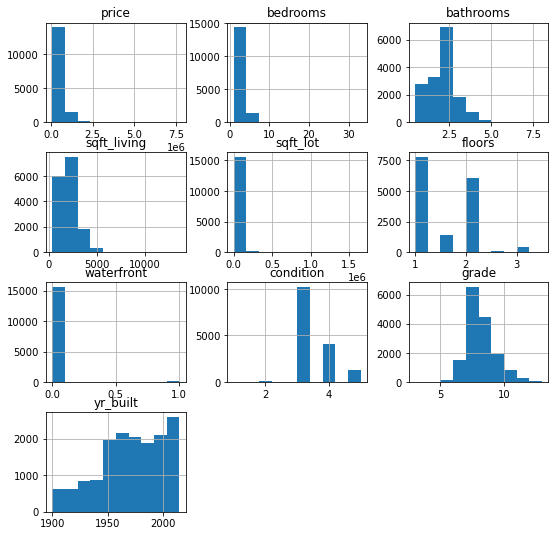

In [11]:
fig = plt.figure(figsize = (9,9))
ax = fig.gca()
d2.hist(ax = ax);

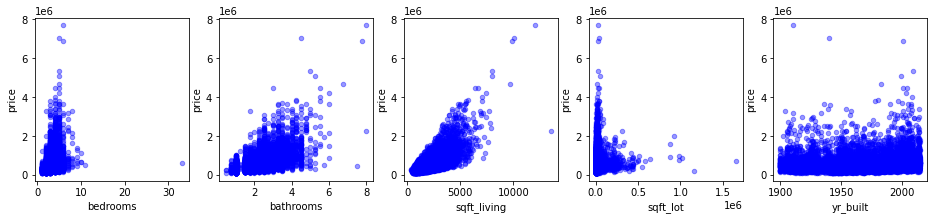

In [12]:
#Checking for categorical variables as they generate vertical lines
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['bedrooms','bathrooms','sqft_living','sqft_lot','yr_built'], axes):
    d2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    plt.savefig("/Users/vineeth/Documents/phase_2/continuous.png", dpi=150);

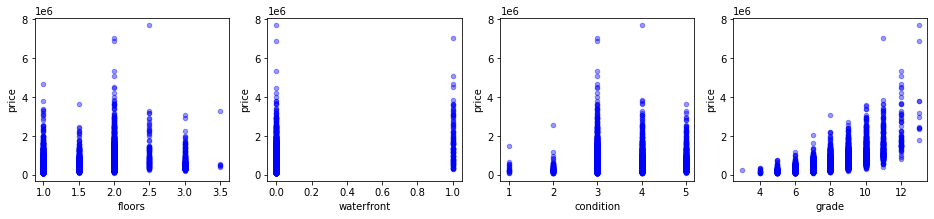

In [13]:
#Checking for categorical variables as they generate vertical lines
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['floors','waterfront','condition','grade'], axes):
    d2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
    plt.savefig("/Users/vineeth/Documents/phase_2/categorical.png", dpi=150);
    

By seeing the Scatter plots, its easy to differentiate category values and contious values.

### Creating Dummy values for Category values 

In [14]:
#Creating Dummy Variables
fl_dummies = pd.get_dummies(d2['floors'], prefix='fl', drop_first=True)
wtr_dummies = pd.get_dummies(d2['waterfront'], prefix='wtr', drop_first=True)
cod_dummies = pd.get_dummies(d2['condition'], prefix='cod', drop_first=True)
gd_dummies = pd.get_dummies(d2['grade'], prefix='gd', drop_first=True)

In [15]:
#Creating the raw data after creating dummy values
d3 = d2.drop(['floors','waterfront','condition','grade'], axis=1) 

In [16]:
#Concatating dummy values with the data set
d3 = pd.concat([d3, fl_dummies, wtr_dummies, cod_dummies,gd_dummies], axis=1)
d3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,fl_1.5,fl_2.0,fl_2.5,fl_3.0,...,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,gd_13
1,538000.0,3,2.25,2570,7242,1951,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1965,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1230000.0,4,4.50,5420,101930,2001,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,257500.0,3,2.25,1715,6819,1995,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
#Renaming column names
d3=d3.rename(columns={'fl_1.5':'fl_1','fl_2.0':'fl_2','fl_2.5':'fl_3','fl_3.0':'fl_4',
                      'fl_3.5':'fl_5','wtr_1.0':'wtr_1'})

### Identifying multicollinearity

To identify the relationship between each predictor and the outcome variable. The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. And it is exactly because of that reason that multicollinearity can cause problems.



In [18]:
d2_colli=d2.iloc[:,1:10]
d2_colli.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,3,2.25,2570,7242,2.0,0.0,3,7,1951
3,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,3,2.00,1680,8080,1.0,0.0,3,8,1987
5,4,4.50,5420,101930,1.0,0.0,3,11,2001
6,3,2.25,1715,6819,2.0,0.0,3,7,1995


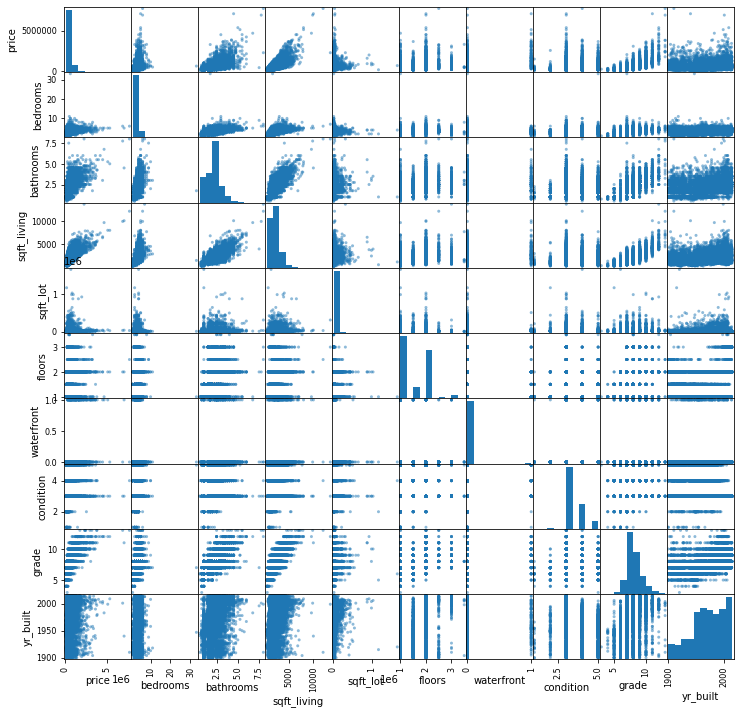

In [19]:
#Creating the Scatter Plot
pd.plotting.scatter_matrix(d2, figsize=[12, 12]);

In [20]:
#Trying to find Multicollinearity between variables
d2_colli.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,1.000000,0.512243,0.573575,0.025460,0.180485,-0.005833,0.020074,0.354243,0.153229
bathrooms,0.512243,1.000000,0.753846,0.080362,0.505187,0.065688,-0.130287,0.664748,0.504841
sqft_living,0.573575,0.753846,1.000000,0.165336,0.359407,0.111491,-0.062319,0.764251,0.314220
sqft_lot,0.025460,0.080362,0.165336,1.000000,-0.009924,0.025982,-0.016036,0.108950,0.051578
floors,0.180485,0.505187,0.359407,-0.009924,1.000000,0.018382,-0.261013,0.459843,0.487052
waterfront,-0.005833,0.065688,0.111491,0.025982,0.018382,1.000000,0.016454,0.083034,-0.024068
condition,0.020074,-0.130287,-0.062319,-0.016036,-0.261013,0.016454,1.000000,-0.147810,-0.366938
grade,0.354243,0.664748,0.764251,0.108950,0.459843,0.083034,-0.147810,1.000000,0.443286
yr_built,0.153229,0.504841,0.314220,0.051578,0.487052,-0.024068,-0.366938,0.443286,1.000000


In [21]:
abs(d2_colli.corr())>0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,True,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,True,False,False
grade,False,False,True,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,True


In [22]:
colli=d2_colli.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
colli['pairs'] = list(zip(colli.level_0, colli.level_1))

# set index to pairs
colli.set_index(['pairs'], inplace = True)

#d rop level columns
colli.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
colli.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
colli.drop_duplicates(inplace=True)

In [23]:
colli[(colli.cc>.75) & (colli.cc <1)]

,cc
pairs,
"(sqft_living, grade)",0.764251
"(bathrooms, sqft_living)",0.753846


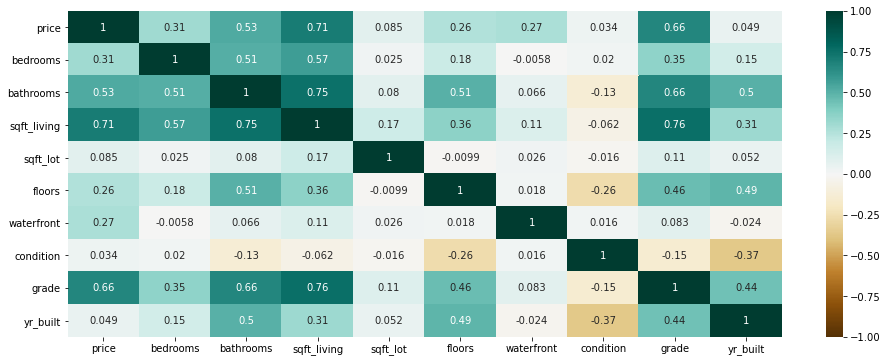

In [24]:
#Creeating Heatman for multicollinearity
plt.figure(figsize=(16, 6))
sns.heatmap(d2.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
plt.savefig("/Users/vineeth/Documents/phase_2/Heatbox of multicollinearity.png", dpi=150);


As no multicollinearity is observed, all the variables are safe to create a model.

### Creating OLS Model 

In [25]:
#OLS Model
outcome = 'price'
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','yr_built','cod_2','cod_3','cod_4','cod_5','fl_1','fl_2',
          'fl_3','fl_4','fl_5','wtr_1','gd_4','gd_5','gd_6','gd_7','gd_8','gd_9','gd_10','gd_11','gd_12','gd_13']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=d3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1325.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:48:02   Log-Likelihood:            -2.1562e+05
No. Observations:               15762   AIC:                         4.313e+05
Df Residuals:                   15736   BIC:                         4.315e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      6.9e+06   2.71e+05     25.492      0.000    6.37e+06    7.43e+06
bedrooms    -2.883e+04   2349.401    -12.270      0.000   -3.34e+04   -2.42e+04
bathrooms    5.841e+04   3957.475     14.759      0.000    5.07e+04    6.62e+04
sqft_living   156.2992      3.911     39.968      0.000     148.634     163.964
sqft_lot       -0.2638      0.041     -6.379      0.000      -0.345      -0.183
yr_built    -3538.6682     84.434    -41.910      0.000   -3704.169   -3373.168
cod_2       -2.008e+04    5.2e+04     -0.386      0.700   -1.22e+05    8.19e+04
cod_3        1.155e+04   4.89e+04      0.236      0.813   -8.44e+04    1.07e+05
cod_4        2.338e+04   4.89e+04      0.478      0.633   -7.25e+04    1.19e+05
cod_5        6.306e+04   4.92e+04      1.282      0.200   -3.33e+04    1.59e+05
fl_1        -5033.4348   6582.308     -0.765      0.444   -1.79e+04    7868.644
fl_2         4232.4924   4788.854      0.884      0.377   -5154.210    1.36e+04
fl_3         9.816e+04   2.01e+04      4.881      0.000    5.87e+04    1.38e+05
fl_4         1.304e+05   1.13e+04     11.566      0.000    1.08e+05    1.52e+05
fl_5         1.803e+05   8.66e+04      2.083      0.037    1.06e+04     3.5e+05
wtr_1        7.289e+05   1.97e+04     37.076      0.000     6.9e+05    7.67e+05
gd_4          4.17e+04   2.18e+05      0.191      0.848   -3.86e+05    4.69e+05
gd_5         2.151e+04   2.12e+05      0.101      0.919   -3.94e+05    4.37e+05
gd_6          7.43e+04   2.12e+05      0.351      0.725    -3.4e+05    4.89e+05
gd_7         1.523e+05   2.12e+05      0.720      0.472   -2.62e+05    5.67e+05
gd_8         2.427e+05   2.12e+05      1.147      0.251   -1.72e+05    6.58e+05
gd_9         3.891e+05   2.12e+05      1.838      0.066   -2.59e+04    8.04e+05
gd_10        5.706e+05   2.12e+05      2.693      0.007    1.55e+05    9.86e+05
gd_11        7.985e+05   2.12e+05      3.762      0.000    3.83e+05    1.21e+06
gd_12        1.322e+06   2.14e+05      6.186      0.000    9.03e+05    1.74e+06
gd_13        2.393e+06   2.22e+05     10.781      0.000    1.96e+06    2.83e+06
==============================================================================
Omnibus:                     9298.498   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           355982.071
Skew:                           2.230   Prob(JB):                         0.00
Kurtosis:                      25.851   Cond. No.                     1.86e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Plot histograms with kde overlay to check the distribution of the predictors

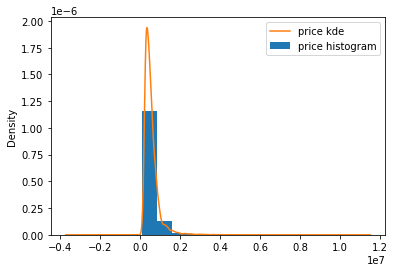

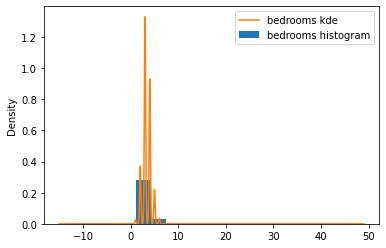

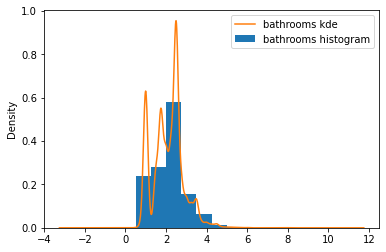

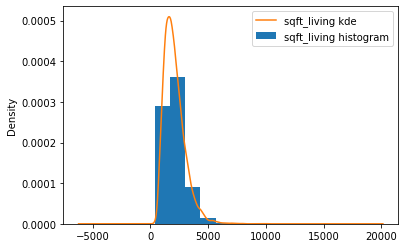

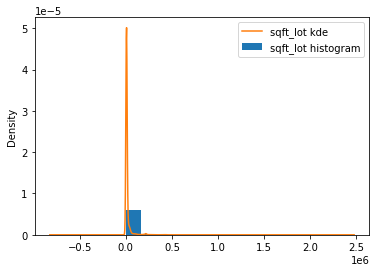

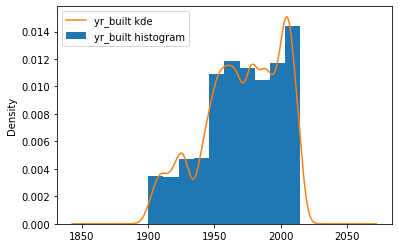

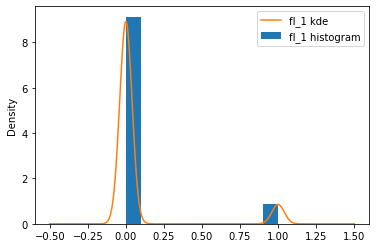

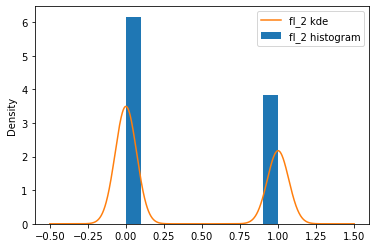

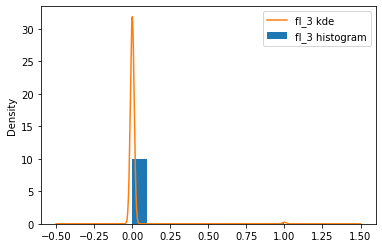

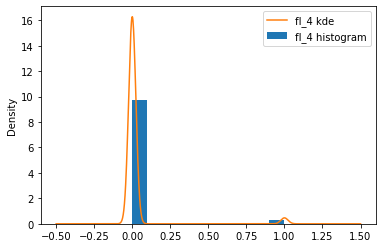

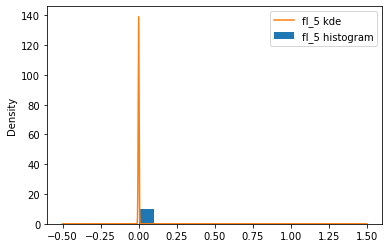

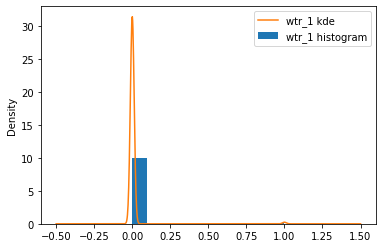

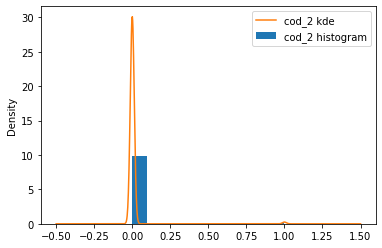

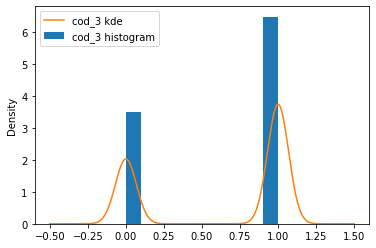

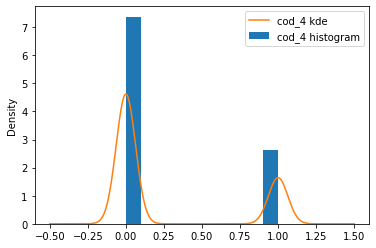

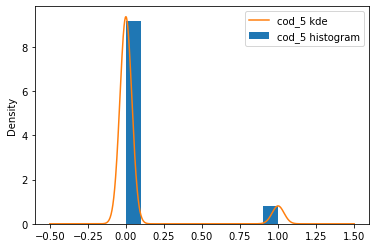

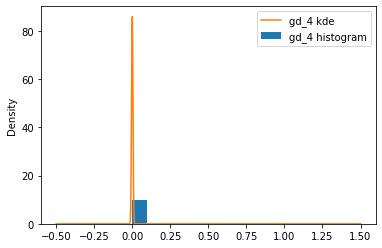

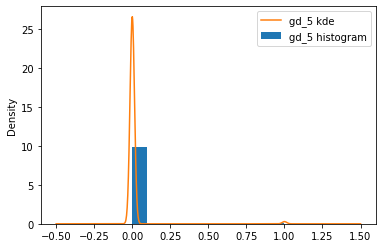

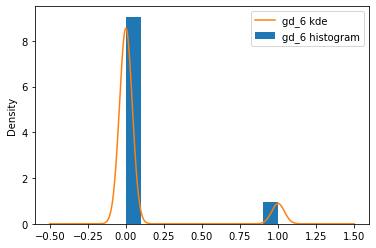

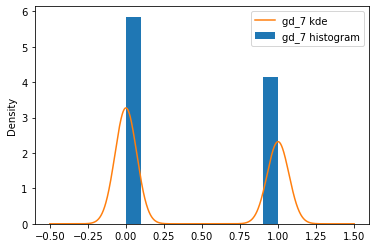

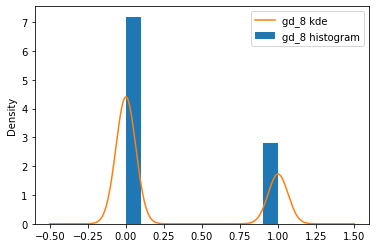

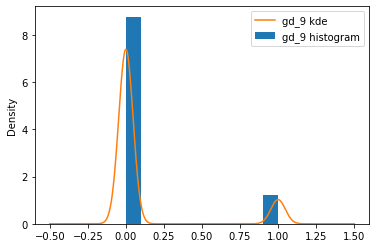

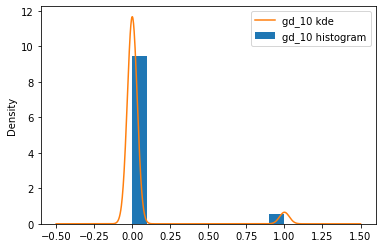

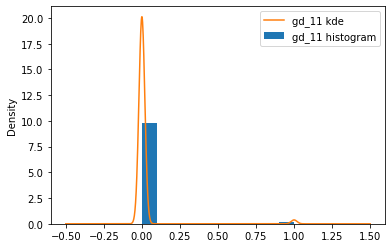

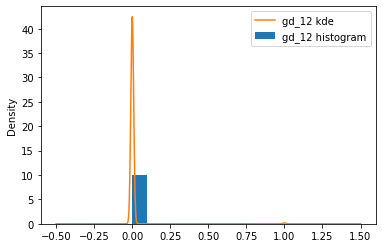

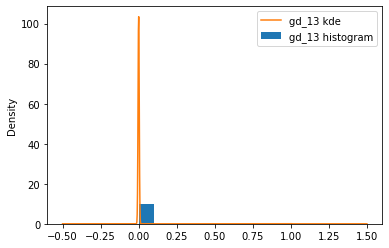

In [27]:
for column in d3:
    d3[column].plot.hist(density=True, label = column+' histogram')
    d3[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

None of the variables are normally distributed other than bit of Skewing in Price, Living, Sqft_lot, Waterfront.

### Q-Q plot

Q-Q plot is one way to check the normality assumption. If the residuals are normally distributed, their points will mostly fall along a straight line.

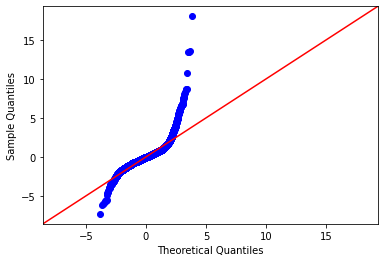

<Figure size 432x288 with 0 Axes>

In [28]:
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()
plt.savefig("/Users/vineeth/Documents/phase_2/Q-Qplot.png", dpi=150);

As it clearly appears that the normal distribution is not taking place from the Scatter Plot.

### Homoscedasticity


To visualize this, I made a scatterplot with the model’s residuals on the y axis and fitted values on the x-axis. For the homoscedasticity assumption to be satisfied, the shape of the points should be roughly symmetrical across a line at y=0.

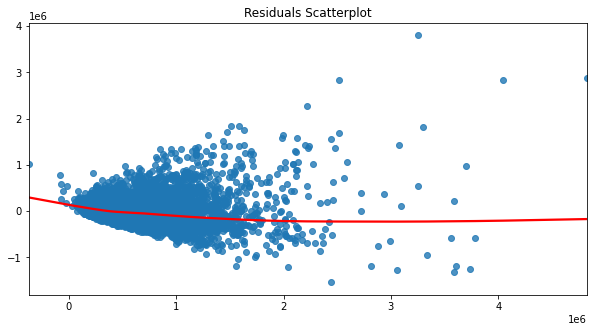

In [29]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot')
plt.savefig("/Users/vineeth/Documents/phase_2/Residuals Scatterplot.png", dpi=150);

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1325.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:48:22   Log-Likelihood:            -2.1562e+05
No. Observations:               15762   AIC:                         4.313e+05
Df Residuals:                   15736   BIC:                         4.315e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      6.9e+06   2.71e+05     25.492      0.000    6.37e+06    7.43e+06
bedrooms    -2.883e+04   2349.401    -12.270      0.000   -3.34e+04   -2.42e+04
bathrooms    5.841e+04   3957.475     14.759      0.000    5.07e+04    6.62e+04
sqft_living   156.2992      3.911     39.968      0.000     148.634     163.964
sqft_lot       -0.2638      0.041     -6.379      0.000      -0.345      -0.183
yr_built    -3538.6682     84.434    -41.910      0.000   -3704.169   -3373.168
cod_2       -2.008e+04    5.2e+04     -0.386      0.700   -1.22e+05    8.19e+04
cod_3        1.155e+04   4.89e+04      0.236      0.813   -8.44e+04    1.07e+05
cod_4        2.338e+04   4.89e+04      0.478      0.633   -7.25e+04    1.19e+05
cod_5        6.306e+04   4.92e+04      1.282      0.200   -3.33e+04    1.59e+05
fl_1        -5033.4348   6582.308     -0.765      0.444   -1.79e+04    7868.644
fl_2         4232.4924   4788.854      0.884      0.377   -5154.210    1.36e+04
fl_3         9.816e+04   2.01e+04      4.881      0.000    5.87e+04    1.38e+05
fl_4         1.304e+05   1.13e+04     11.566      0.000    1.08e+05    1.52e+05
fl_5         1.803e+05   8.66e+04      2.083      0.037    1.06e+04     3.5e+05
wtr_1        7.289e+05   1.97e+04     37.076      0.000     6.9e+05    7.67e+05
gd_4          4.17e+04   2.18e+05      0.191      0.848   -3.86e+05    4.69e+05
gd_5         2.151e+04   2.12e+05      0.101      0.919   -3.94e+05    4.37e+05
gd_6          7.43e+04   2.12e+05      0.351      0.725    -3.4e+05    4.89e+05
gd_7         1.523e+05   2.12e+05      0.720      0.472   -2.62e+05    5.67e+05
gd_8         2.427e+05   2.12e+05      1.147      0.251   -1.72e+05    6.58e+05
gd_9         3.891e+05   2.12e+05      1.838      0.066   -2.59e+04    8.04e+05
gd_10        5.706e+05   2.12e+05      2.693      0.007    1.55e+05    9.86e+05
gd_11        7.985e+05   2.12e+05      3.762      0.000    3.83e+05    1.21e+06
gd_12        1.322e+06   2.14e+05      6.186      0.000    9.03e+05    1.74e+06
gd_13        2.393e+06   2.22e+05     10.781      0.000    1.96e+06    2.83e+06
==============================================================================
Omnibus:                     9298.498   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           355982.071
Skew:                           2.230   Prob(JB):                         0.00
Kurtosis:                      25.851   Cond. No.                     1.86e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
d3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,fl_1,fl_2,fl_3,fl_4,...,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,gd_13
1,538000.0,3,2.25,2570,7242,1951,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1965,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1230000.0,4,4.50,5420,101930,2001,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,257500.0,3,2.25,1715,6819,1995,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


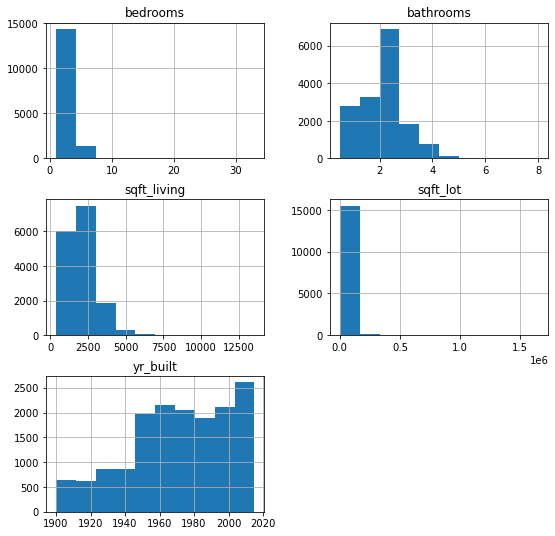

In [32]:
#Checking Histogram for Continuous variables
d3[['bedrooms','bathrooms','sqft_living','sqft_lot','yr_built']].hist(figsize=[9,9]);

### Performing log transformations for the variables

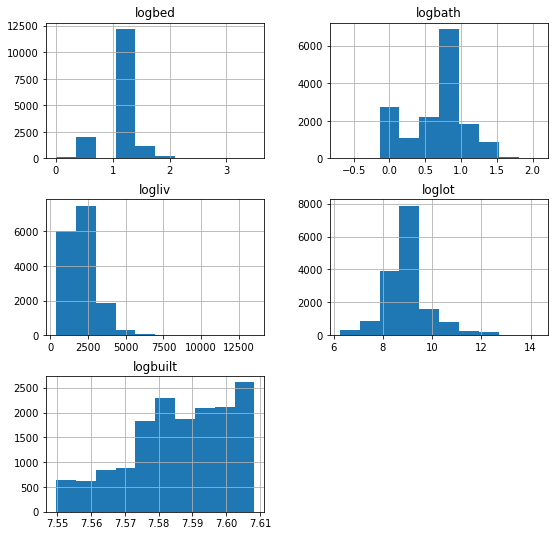

In [33]:
d3_log = pd.DataFrame([])
d3_log['logbed'] = np.log(d3['bedrooms'])
d3_log['logbath'] = np.log(d3['bathrooms'])
d3_log['logliv'] = d3['sqft_living'] #As this is normally distributed 
d3_log['loglot'] = np.log(d3['sqft_lot'])
d3_log['logbuilt'] = np.log(d3['yr_built'])
d3_log.hist(figsize  = [9,9]);

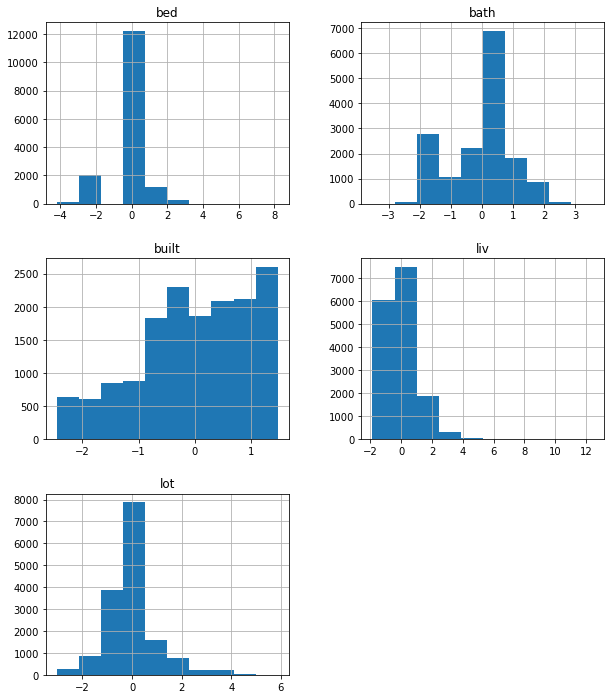

In [34]:
logbed = d3_log['logbed']
logbath = d3_log['logbath']
logliv = d3_log['logliv']
loglot = d3_log['loglot']
logbuilt = d3_log['logbuilt']

scaled_bed = (logbed - np.mean(logbed)) / np.sqrt(np.var(logbed))
scaled_bath = (logbath - np.mean(logbath)) / np.sqrt(np.var(logbath))
scaled_lot = (loglot - np.mean(loglot)) / np.sqrt(np.var(loglot))
scaled_built = (logbuilt - np.mean(logbuilt)) / np.sqrt(np.var(logbuilt))
scaled_liv= (logliv - np.mean(logliv)) / np.sqrt(np.var(logliv))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['bed'] = scaled_bed
data_cont_scaled['bath'] = scaled_bath
data_cont_scaled['built'] = scaled_built
data_cont_scaled['liv'] = scaled_liv
data_cont_scaled['lot'] = scaled_lot

data_cont_scaled.hist(figsize = [10, 12]);

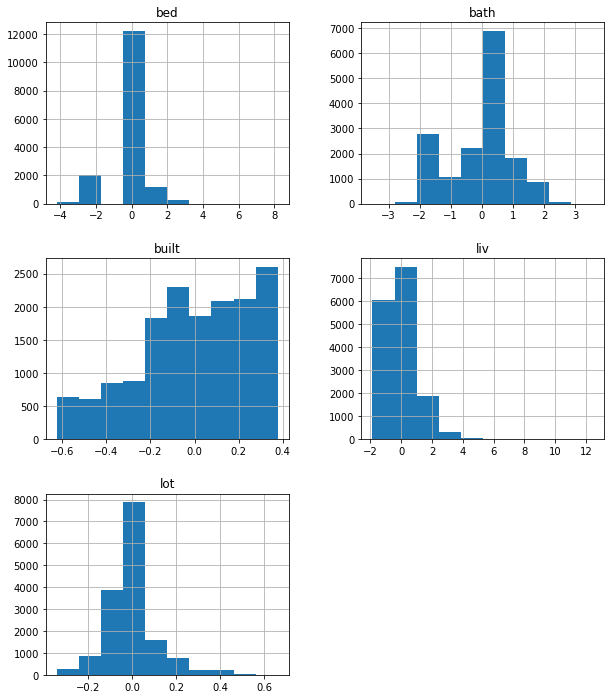

In [35]:
scaled_built = (logbuilt - np.mean(logbuilt)) / (max(logbuilt) - min(logbuilt))
scaled_lot = (loglot - np.mean(loglot)) / (max(loglot) - min(loglot))


data_cont_scaled = pd.DataFrame([])
data_cont_scaled['bed'] = scaled_bed
data_cont_scaled['bath'] = scaled_bath
data_cont_scaled['built'] = scaled_built
data_cont_scaled['liv'] = scaled_liv
data_cont_scaled['lot'] = scaled_lot

data_cont_scaled.hist(figsize = [10, 12]);

In [36]:

d4 = pd.concat([ data_cont_scaled, d3], axis=1)
d4.head()

,bed,bath,built,liv,lot,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,gd_13
1,-0.285706,0.333400,-0.172620,0.528515,-0.013363,538000.0,3,2.25,2570,7242,...,0,0,0,1,0,0,0,0,0,0
3,0.730646,1.069551,-0.050947,-0.135547,-0.059307,604000.0,4,3.00,1960,5000,...,0,0,0,1,0,0,0,0,0,0
4,-0.285706,0.032005,0.138514,-0.440363,0.000217,510000.0,3,2.00,1680,8080,...,0,0,0,0,1,0,0,0,0,0
5,0.730646,2.107097,0.257991,3.631101,0.314592,1230000.0,4,4.50,5420,101930,...,0,0,0,0,0,0,0,1,0,0
6,-0.285706,0.333400,0.206889,-0.402261,-0.020827,257500.0,3,2.25,1715,6819,...,0,0,0,1,0,0,0,0,0,0


In [37]:
#Removing raw variables after Log transformation
d4=d4.drop(['bedrooms', 'bathrooms','sqft_living','sqft_lot','yr_built'], axis = 1)

In [38]:
#Recreating OLS Model
outcome = 'price'
predictors = d4.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [39]:
model = ols(formula=formula, data=d4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1345.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:48:24   Log-Likelihood:            -2.1554e+05
No. Observations:               15762   AIC:                         4.311e+05
Df Residuals:                   15736   BIC:                         4.313e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.906e+05   2.16e+05      1.344      0.179   -1.33e+05    7.14e+05
bed        -2.745e+04   2234.541    -12.283      0.000   -3.18e+04   -2.31e+04
bath        2.068e+04   2974.634      6.952      0.000    1.49e+04    2.65e+04
built      -3.762e+05   9796.247    -38.398      0.000   -3.95e+05   -3.57e+05
liv         1.723e+05   3591.525     47.984      0.000    1.65e+05    1.79e+05
lot        -3.138e+05   1.78e+04    -17.604      0.000   -3.49e+05   -2.79e+05
fl_1       -1.214e+04   6586.706     -1.844      0.065   -2.51e+04     765.717
fl_2       -9980.9852   4899.641     -2.037      0.042   -1.96e+04    -377.127
fl_3        7.074e+04   2.01e+04      3.518      0.000    3.13e+04     1.1e+05
fl_4        7.703e+04   1.18e+04      6.536      0.000    5.39e+04       1e+05
fl_5        1.165e+05   8.62e+04      1.351      0.177   -5.25e+04    2.85e+05
wtr_1       7.433e+05   1.96e+04     37.959      0.000    7.05e+05    7.82e+05
cod_2      -2.144e+04   5.18e+04     -0.414      0.679   -1.23e+05       8e+04
cod_3      -2380.5418   4.87e+04     -0.049      0.961   -9.78e+04    9.31e+04
cod_4       1.564e+04   4.87e+04      0.321      0.748   -7.98e+04    1.11e+05
cod_5       5.284e+04   4.89e+04      1.080      0.280   -4.31e+04    1.49e+05
gd_4        4.301e+04   2.17e+05      0.198      0.843   -3.82e+05    4.68e+05
gd_5        2.863e+04   2.11e+05      0.136      0.892   -3.85e+05    4.42e+05
gd_6        7.673e+04   2.11e+05      0.364      0.716   -3.36e+05    4.89e+05
gd_7        1.539e+05   2.11e+05      0.731      0.465   -2.59e+05    5.67e+05
gd_8        2.444e+05   2.11e+05      1.160      0.246   -1.68e+05    6.57e+05
gd_9        3.917e+05   2.11e+05      1.859      0.063   -2.13e+04    8.05e+05
gd_10       5.794e+05   2.11e+05      2.748      0.006    1.66e+05    9.93e+05
gd_11       8.083e+05   2.11e+05      3.828      0.000    3.94e+05    1.22e+06
gd_12       1.333e+06   2.13e+05      6.271      0.000    9.16e+05    1.75e+06
gd_13       2.391e+06   2.21e+05     10.829      0.000    1.96e+06    2.82e+06
==============================================================================
Omnibus:                     9256.078   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           346782.490
Skew:                           2.221   Prob(JB):                         0.00
Kurtosis:                      25.545   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Performing stepwise selection 

This is performed as to remove P values which are greater than 0.05.

In [40]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [41]:
X = d4.drop('price', axis=1)
y = d4['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  gd_11                          with p-value 0.0
Add  gd_12                          with p-value 0.0
Add  gd_10                          with p-value 0.0
Add  gd_9                           with p-value 0.0
Add  gd_13                          with p-value 0.0
Add  liv                            with p-value 0.0
Add  built                          with p-value 5.15122e-310
Add  wtr_1                          with p-value 4.44172e-280
Add  gd_8                           with p-value 1.60057e-143
Add  lot                            with p-value 2.30311e-116
Add  gd_7                           with p-value 1.20341e-39
Add  bed                            with p-value 5.24118e-28
Add  cod_5                          with p-value 2.36334e-16
Add  fl_4                           with p-value 5.71444e-15
Add  bath                           with p-value 1.02815e-11
Add  cod_4                          with p-value 2.06078e-06
Add  fl_3                           with p-value 7.16422e-05
Add  gd

### Final Building Of Model 

In [42]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1868.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:48:27   Log-Likelihood:            -2.1554e+05
No. Observations:               15762   AIC:                         4.311e+05
Df Residuals:                   15743   BIC:                         4.313e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.108e+05   1.62e+04     19.160      0.000    2.79e+05    3.43e+05
gd_11       7.785e+05   2.26e+04     34.426      0.000    7.34e+05    8.23e+05
gd_12       1.306e+06   3.34e+04     39.127      0.000    1.24e+06    1.37e+06
gd_10       5.493e+05   1.91e+04     28.779      0.000    5.12e+05    5.87e+05
gd_9        3.616e+05   1.76e+04     20.502      0.000    3.27e+05    3.96e+05
gd_13       2.365e+06   6.83e+04     34.629      0.000    2.23e+06     2.5e+06
liv         1.717e+05   3578.914     47.983      0.000    1.65e+05    1.79e+05
built      -3.758e+05   8835.102    -42.537      0.000   -3.93e+05   -3.58e+05
wtr_1       7.432e+05   1.96e+04     37.959      0.000    7.05e+05    7.82e+05
gd_8        2.157e+05   1.67e+04     12.904      0.000    1.83e+05    2.49e+05
lot        -3.051e+05   1.72e+04    -17.769      0.000   -3.39e+05   -2.71e+05
gd_7        1.263e+05   1.61e+04      7.825      0.000    9.47e+04    1.58e+05
bed        -2.771e+04   2216.191    -12.504      0.000   -3.21e+04   -2.34e+04
cod_5       5.676e+04   6672.545      8.506      0.000    4.37e+04    6.98e+04
fl_4        8.499e+04    1.1e+04      7.754      0.000    6.35e+04    1.06e+05
bath         1.97e+04   2927.652      6.729      0.000     1.4e+04    2.54e+04
cod_4       1.976e+04   4131.997      4.782      0.000    1.17e+04    2.79e+04
fl_3        7.895e+04   1.98e+04      3.983      0.000    4.01e+04    1.18e+05
gd_6         4.87e+04   1.65e+04      2.949      0.003    1.63e+04    8.11e+04
==============================================================================
Omnibus:                     9273.423   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           348297.130
Skew:                           2.227   Prob(JB):                         0.00
Kurtosis:                      25.594   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Splitting of Data into Training data set and Testing data set 

In [43]:
#Dividing the data into test data and training data
y = d4[['price']]
X = d4.drop(['price'], axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

12609 3153 12609 3153


In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [47]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
#Calculating the mean squared errorr
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 45242619336.10543
Test Mean Squarred Error: 40056388123.05401


As there is no much difference between the training data and test data, our predicted values are almost right.

### Plotting training data error with testing data error 

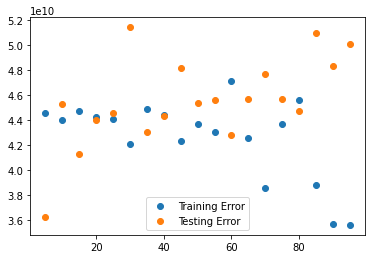

In [50]:
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

### Cross Validation using K-Folds 

In [51]:
#Cross validation
def kfolds(data, k):
    # Force data as pandas DataFrame
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [52]:
ames_data = pd.concat([X.reset_index(drop=True), y], axis=1)

In [53]:
ames_folds = kfolds(ames_data, 5)


In [54]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(ames_folds) if i!=n])
    test = ames_folds[n]
    # Fit a linear regression model
    linreg.fit(X_train, y_train)
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[price    3.561263e+10
dtype: float64, price    3.561263e+10
dtype: float64, price    3.561263e+10
dtype: float64, price    3.561263e+10
dtype: float64, price    3.561263e+10
dtype: float64]
[price    5.010173e+10
dtype: float64, price    5.010173e+10
dtype: float64, price    5.010173e+10
dtype: float64, price    5.010173e+10
dtype: float64, price    5.010173e+10
dtype: float64]


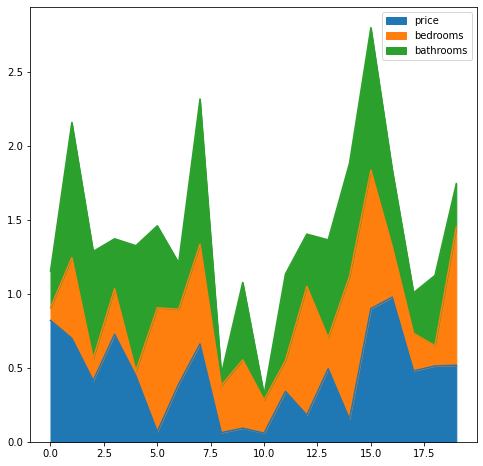

In [55]:
d2 = pd.DataFrame(np.random.rand(20,3),columns=["price", "bedrooms", "bathrooms"])
#

d2.plot.area(figsize=(8,8))
plt.savefig("/Users/vineeth/Documents/phase_2/relation between price,bedrooms and bathrooms.png", dpi=150);